Excercise 3: Power spectra
========

Import sample data sets

In [35]:
from __future__ import division
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams['savefig.dpi'] = 200
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
signal_full = []
dt = [ 1, 0.1 ]
with gzip.GzipFile("signal_1.npy.gz") as f :
    signal_full.append(np.load ( f )*dt[0])
t_full = []
t_full.append(np.arange(len(signal_1)))
with gzip.GzipFile("signal_2.npy.gz") as f :
    signal_full.append(np.load ( f ))
t_full.append(np.arange(len(signal_2))*dt[1])
signal = []
t = []
for (i, s_full) in enumerate(signal_full):
    t.append(t_full[i][t_full[i] <= 100])
    signal.append(s_full[t_full[i] <= 100])

Part a
-------

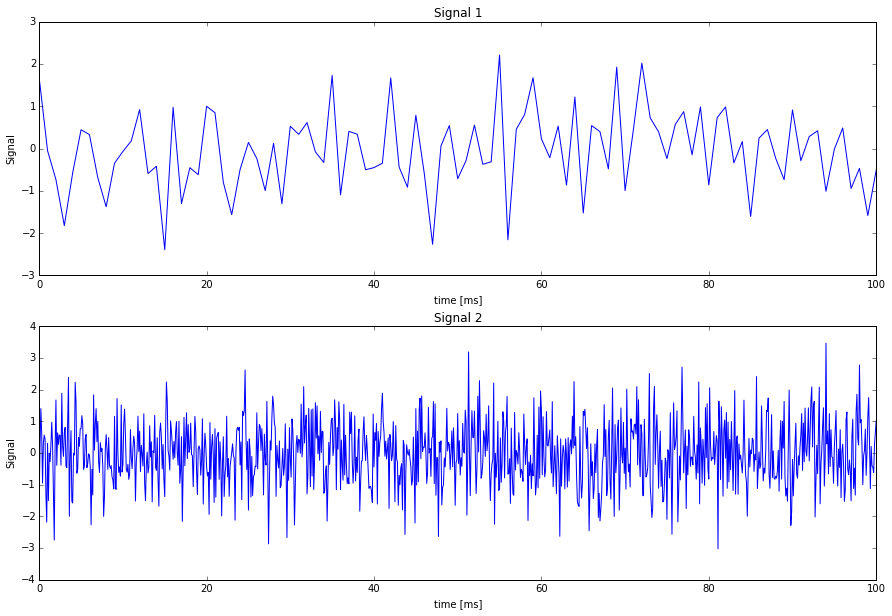

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
for i in range(len(signal)):
    axs[i].plot(t[i], signal[i])
    axs[i].set_xlabel('time [ms]')
    axs[i].set_ylabel('Signal')
    axs[i].set_title('Signal '+str(i+1))

Part b
---

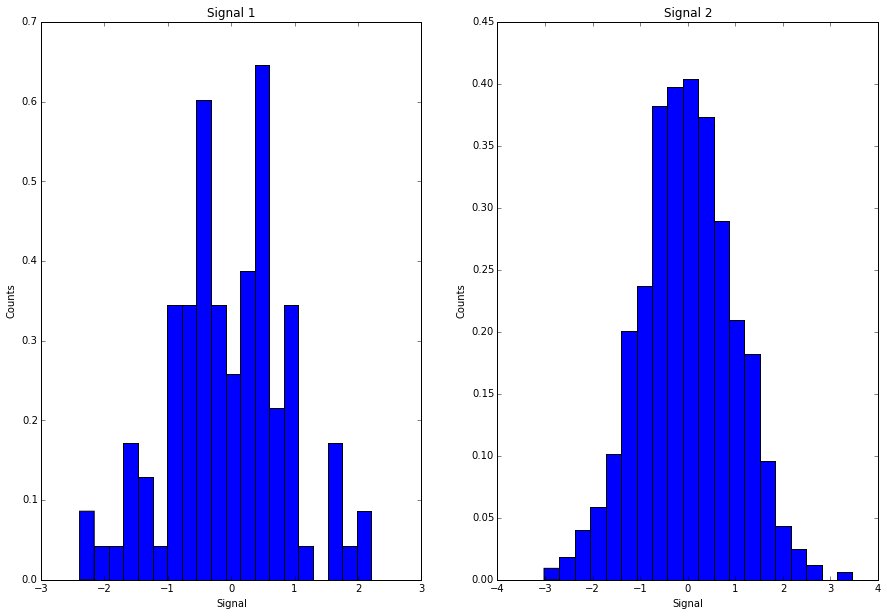

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
for i in range(len(signal)):
    axs[i].hist(signal[i], bins=20, normed=True)
    axs[i].set_xlabel('Signal')
    axs[i].set_ylabel('Counts')
    axs[i].set_title('Signal '+str(i+1))

Part c
---

Use a normalized version of the auto-correlation function: For discrete process with known mwan and variance for which we observe $n$ obvervations $\{X_1,X_2,...,X_n\}$ an estimate of th eautorcorrelation my be obtained as:

\begin{equation}
    \hat{R}(k) = \frac{1}{(n-k)\sigma^2} \sum_{t=1}^{n-k} (X_t - \mu)(X_{t+k} - \mu)
\end{equation}

In [49]:
def acf(series):
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        return round(acf_lag, 3)
    x = np.arange(n) # Avoiding lag 0 calculation
    acf_coeffs = np.array(map(r, x))
    return acf_coeffs

In [50]:
a_sig = map(acf, signal) # auto-correlation of first signal

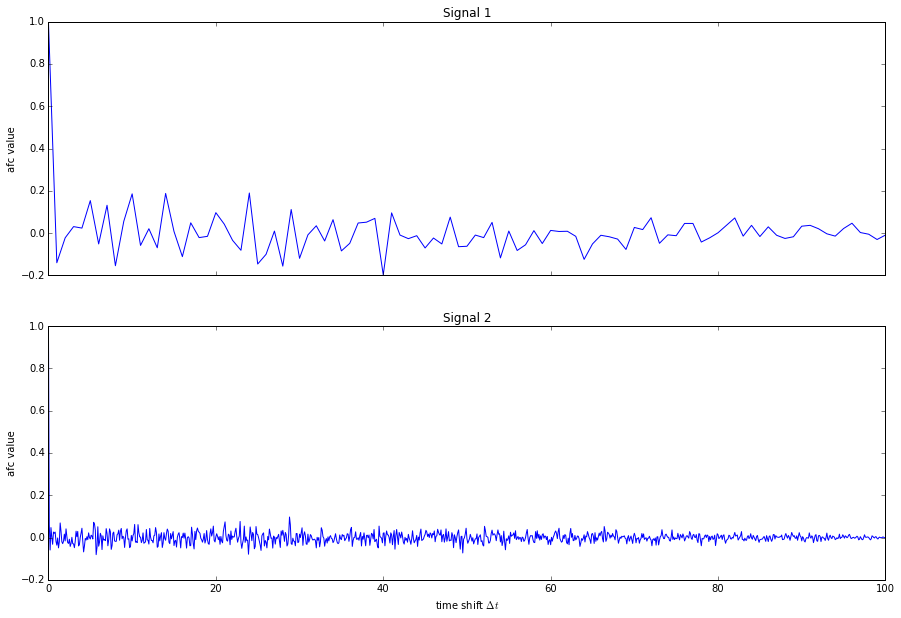

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)
for i in range(len(signal)):
    axs[i].plot(np.arange(len(a_sig[i]))*dt[i], a_sig[i])
    if i is 1:
        axs[i].set_xlabel('time shift $\Delta t$')
    axs[i].set_ylabel('afc value')
    axs[i].set_title('Signal '+str(i+1))

Part d, e
---

We  use the fact that:

\begin{equation}
    \tilde{C}_{ii} = \mathcal{P}_T(\omega)
\end{equation}

in order to calculate th epower spectrum $P_T(\omega)$.

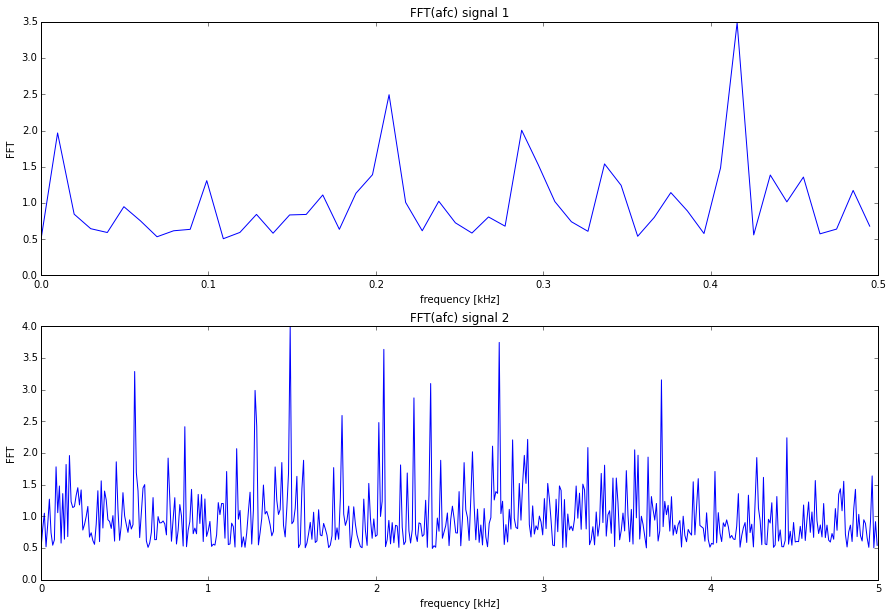

In [86]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
for i in range(len(a_sig)):
    spec = np.fft.rfft(a_sig[i])
    freq = np.fft.rfftfreq(len(a_sig[i]), d=dt[i])
    axs[i].plot(freq, spec)
    axs[i].set_xlabel('frequency [kHz]')
    axs[i].set_ylabel('FFT')
    axs[i].set_title('FFT(afc) signal '+str(i+1))